<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/CNN_food_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-02 15:27:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.0MB/s    in 3.2s    

2025-04-02 15:27:19 (33.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# 1)  !unzip pizza_steak.zip

In [ ]:
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
with zipfile.ZipFile("/content/pizza_steak.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

for dirpath, dirnames, filnames in os.walk('/content/pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filnames)} images in '{dirpath}',")

There are 2 directories and 0 images in '/content/pizza_steak',
There are 2 directories and 0 images in '/content/pizza_steak/train',
There are 0 directories and 750 images in '/content/pizza_steak/train/pizza',
There are 0 directories and 750 images in '/content/pizza_steak/train/steak',
There are 2 directories and 0 images in '/content/pizza_steak/test',
There are 0 directories and 250 images in '/content/pizza_steak/test/pizza',
There are 0 directories and 250 images in '/content/pizza_steak/test/steak',


In [ ]:
num_steak_images_train = len(os.listdir('/content/pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")

Image shape: (382, 512, 3)


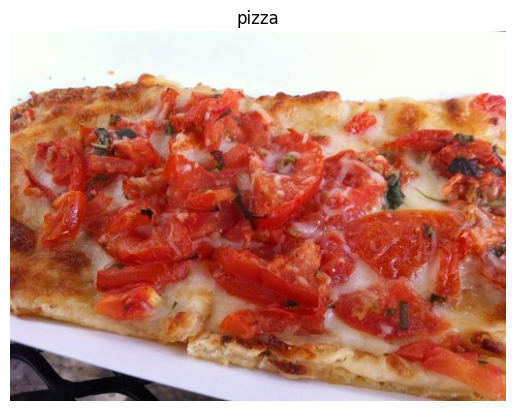

In [ ]:
view_random_image(target_dir = '/content/pizza_steak/train/', target_class = 'pizza')

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, batch_size = 32, seed = 42, image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, batch_size = 32, seed = 42, image_size = IMG_SIZE)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# ML models de CNN le bagli sual ve tapsiriglar, cnn moodel mnist dataseti uzerinde

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = [224, 224, 3]),
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64, activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
              metrics = ['accuracy'])

model.fit(train_data, validation_data = test_data, epochs = 5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.5233 - loss: 0.9866 - val_accuracy: 0.6840 - val_loss: 0.6494
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.5824 - loss: 0.6729 - val_accuracy: 0.7120 - val_loss: 0.6025
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6543 - loss: 0.5989 - val_accuracy: 0.7480 - val_loss: 0.5451
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.6471 - loss: 0.5984 - val_accuracy: 0.7400 - val_loss: 0.4979
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.7540 - loss: 0.5526 - val_accuracy: 0.8020 - val_loss: 0.4475


In [ ]:
model.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.8009 - loss: 0.4391


[0.4511547088623047, 0.7953333258628845]

In [ ]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8011 - loss: 0.4415


[0.4474985599517822, 0.8019999861717224]

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
])

In [ ]:
train_data.class_names

['pizza', 'steak']

In [ ]:
class_names = train_data.class_names

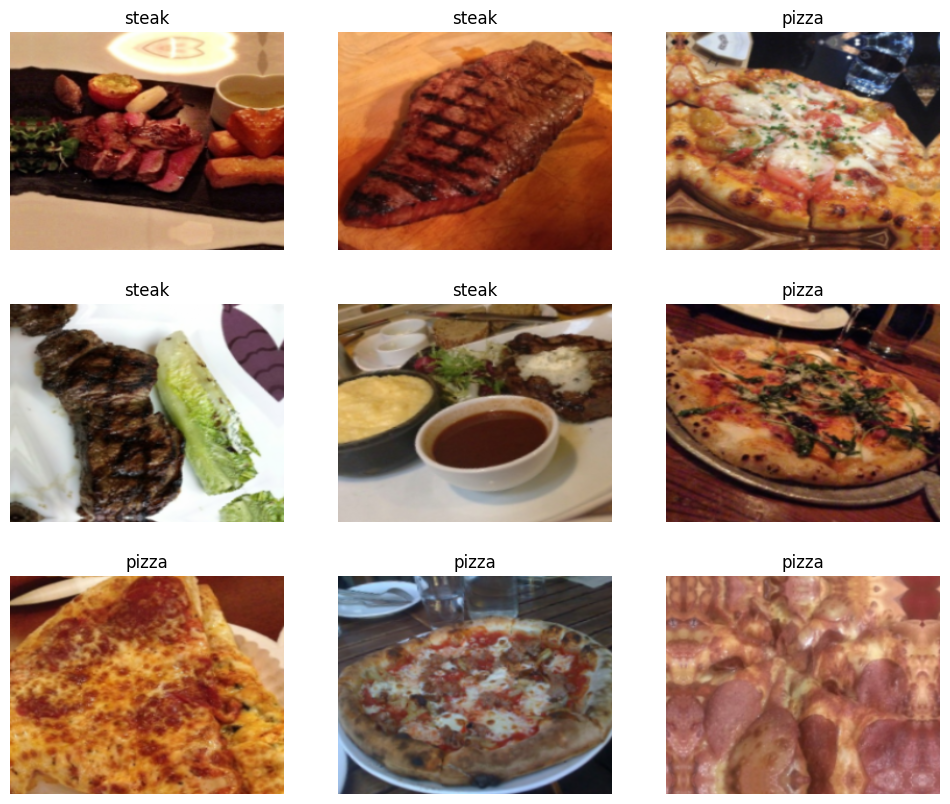

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
for images, labels in train_data.take(1):
    images_augmented = data_augmentation(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images_augmented[i] / 255)
        plt.title(class_names[labels[i].numpy().astype('int8')])
        plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = [224, 224, 3]),
    data_augmentation,
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64, activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0003, momentum = 0.9),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - accuracy: 0.6495 - loss: 0.5935 - val_accuracy: 0.7860 - val_loss: 0.5277
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.6600 - loss: 0.5977 - val_accuracy: 0.7940 - val_loss: 0.5007
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.6923 - loss: 0.5780 - val_accuracy: 0.7820 - val_loss: 0.5208
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.6713 - loss: 0.5796 - val_accuracy: 0.7380 - val_loss: 0.5289
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.7008 - loss: 0.5546 - val_accuracy: 0.8180 - val_loss: 0.4745


In [ ]:
base_model = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet')

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(avg)
model = tf.keras.Model(inputs = base_model.input, outputs = output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate = 0.96,
    staircase = False)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)


model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])

model.fit(train_data, epochs = 100,
          validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 289ms/step - accuracy: 0.9703 - loss: 0.0895 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9739 - loss: 0.0850 - val_accuracy: 0.9860 - val_loss: 0.0611
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9752 - loss: 0.0825 - val_accuracy: 0.9820 - val_loss: 0.0594
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9801 - loss: 0.0781 - val_accuracy: 0.9860 - val_loss: 0.0615
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9762 - loss: 0.0699 - val_accuracy: 0.9840 - val_loss: 0.0572
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9788 - loss: 0.0688 - val_accuracy: 0.9840 - val_loss: 0.0615
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9845 - loss: 0.0625 - val_accuracy: 0.9860 - val_loss: 0.0558
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9809 - loss: 0.0649 - val_a

In [ ]:
inputs = tf.keras.Input(shape = (224, 224, 3))

x = data_augmentation(inputs)

x = tf.keras.applications.resnet50.preprocess_input(x)

base_model = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_tensor = x)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate = 0.96,
    staircase = False)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)


model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])

model.fit(train_data, epochs = 100,
          validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 948ms/step - accuracy: 0.8305 - loss: 0.3291 - val_accuracy: 0.9880 - val_loss: 0.0450
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 630ms/step - accuracy: 0.9662 - loss: 0.0883 - val_accuracy: 0.9900 - val_loss: 0.0440
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 596ms/step - accuracy: 0.9754 - loss: 0.0617 - val_accuracy: 0.9940 - val_loss: 0.0395
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 551ms/step - accuracy: 0.9797 - loss: 0.0602 - val_accuracy: 0.9880 - val_loss: 0.0543
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 447ms/step - accuracy: 0.9758 - loss: 0.0636 - val_accuracy: 0.9900 - val_loss: 0.0397
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 434ms/step - accuracy: 0.9806 - loss: 0.0506 - val_accuracy: 0.9900 - val_loss: 0.0447
